In [34]:
import networkx as nx
import random
import re
import matplotlib.pyplot as plt
import numpy as np


###############################
# Morphology for handling plurals and proper nouns

class Morphology(object):
    def __init__(self):
        self.plural_nouns = {}
        self.reverse_plural_nouns = {}
        self.proper_nouns = []

    def add_noun(self, noun, plural):
        if noun in self.plural_nouns:
            raise Exception("The noun '{}' was already added.".format(noun))
        if plural in self.reverse_plural_nouns:
            raise Exception("The plural noun '{}' was already added.".format(plural))
        self.plural_nouns[noun] = plural
        self.reverse_plural_nouns[plural] = noun

    def add_proper_noun(self, noun):
        self.proper_nouns.append(noun.lower())

    def is_noun(self, word):
        return word in self.plural_nouns

    def is_plural_noun(self, word):
        return word in self.reverse_plural_nouns

    def is_proper_noun(self, word):
        return word.lower() in self.proper_nouns

    def to_plural(self, noun):
        return self.plural_nouns[noun]

    def to_root(self, plural):
        return self.reverse_plural_nouns[plural]


# Initialize morphology and add some sample nouns.
morphology = Morphology()
morphology.add_noun("wumpus", "wumpuses")
morphology.add_noun("yumpus", "yumpuses")
morphology.add_noun("zumpus", "zumpuses")
morphology.add_noun("dumpus", "dumpuses")
morphology.add_noun("rompus", "rompuses")
morphology.add_noun("numpus", "numpuses")
morphology.add_noun("tumpus", "tumpuses")
morphology.add_noun("vumpus", "vumpuses")
morphology.add_noun("impus", "impuses")
morphology.add_noun("jompus", "jompuses")
morphology.add_noun("timpus", "timpuses")
morphology.add_noun("yimpus", "yimpuses")
morphology.add_noun("carpus", "carpuses")
morphology.add_noun("shumpus", "shumpuses")
morphology.add_noun("zhompus", "zhompuses")
morphology.add_noun("rempus", "rempuses")
morphology.add_noun("fompus", "fompuses")
morphology.add_noun("fimpus", "fimpuses")
morphology.add_noun("worpus", "worpus")
morphology.add_noun("sorpus", "sorpus")
morphology.add_noun("terpus", "terpuses")
morphology.add_noun("gerpus", "gerpuses")
morphology.add_noun("sterpus", "sterpuses")
morphology.add_noun("kerpus", "kerpuses")
morphology.add_noun("sherpus", "sherpuses")
morphology.add_noun("perpus", "perpuses")
morphology.add_noun("bompus", "bompuses")
morphology.add_noun("orpus", "orpuses")
morphology.add_noun("welpus", "welpuses")
morphology.add_noun("jelpus", "jelpuses")
morphology.add_noun("felpus", "felpuses")
morphology.add_noun("dolpus", "dolpuses")
morphology.add_noun("sarpus", "sarpuses")
morphology.add_noun("irpus", "irpuses")
morphology.add_noun("chorpus", "chorpuses")
morphology.add_noun("parpus", "parpuses")
morphology.add_noun("arpus", "arpuses")
morphology.add_noun("lempus", "lempuses")
morphology.add_noun("hilpus", "hilpuses")
morphology.add_noun("gompus", "gompuses")
morphology.add_noun("dalpus", "dalpuses")
morphology.add_noun("umpus", "umpuses")
morphology.add_noun("rifpus", "rifpuses")
morphology.add_noun("storpus", "storpuses")
morphology.add_noun("shalpus", "shalpuses")
morphology.add_noun("yerpus", "yerpuses")
morphology.add_noun("ilpus", "ilpuses")
morphology.add_noun("boompus", "boompuses")
morphology.add_noun("scrompus", "scrompuses")
morphology.add_noun("phorpus", "phorpuses")
morphology.add_noun("prilpus", "prilpuses")
morphology.add_noun("gwompus", "gwompuses")
morphology.add_noun("urpus", "urpuses")
morphology.add_noun("grimpus", "grimpuses")
morphology.add_noun("shilpus", "shilpuses")
morphology.add_noun("zhorpus", "zhorpuses")
morphology.add_noun("rorpus", "rorpuses")
morphology.add_noun("dropus", "dropuses")
morphology.add_noun("lerpus", "lerpuses")
morphology.add_noun("quimpus", "quimpuses")
morphology.add_noun("zilpus", "zilpuses")
morphology.add_noun("frompus", "frompuses")
morphology.add_noun("stirpus", "stirpuses")
morphology.add_noun("porpus", "porpuses")
morphology.add_noun("kurpus", "kurpuses")
morphology.add_noun("shampus", "shampuses")
morphology.add_noun("werpus", "werpuses")
morphology.add_noun("zhimpus", "zhimpuses")
morphology.add_noun("yempus", "yempuses")
morphology.add_noun("jempus", "jempuses")
morphology.add_noun("folpus", "folpuses")
morphology.add_noun("drompus", "drompuses")
morphology.add_noun("delpus", "delpuses")
morphology.add_noun("lompus", "lompuses")
morphology.add_noun("wolpus", "wolpuses")
morphology.add_noun("gorpus", "gorpuses")
morphology.add_noun("shimpus", "shimpuses")
morphology.add_noun("rimpus", "rimpuses")
morphology.add_noun("twimpus", "twimpuses")
morphology.add_noun("serpus", "serpuses")
morphology.add_noun("daumpus", "daumpuses")
morphology.add_noun("thorpus", "thorpuses")
morphology.add_noun("borpus", "borpuses")
morphology.add_noun("rofpus", "rofpuses")
morphology.add_noun("bempus", "bempuses")
morphology.add_noun("dulpus", "dulpuses")
morphology.add_noun("harpus", "harpuses")
morphology.add_noun("lirpus", "lirpuses")
morphology.add_noun("yompus", "yompuses")
morphology.add_noun("stopus", "stopuses")
morphology.add_noun("timple", "timples")
morphology.add_noun("yimple", "yimples")
morphology.add_noun("starple", "starples")
morphology.add_noun("shumple", "shumples")
morphology.add_noun("zhomple", "zhomples")
morphology.add_noun("remple", "remples")
morphology.add_noun("fomple", "fomples")
morphology.add_noun("fimple", "fimples")
morphology.add_noun("worple", "worples")
morphology.add_noun("sorple", "sorples")
morphology.add_noun("tergit", "tergits")
morphology.add_noun("gergit", "gergits")
morphology.add_noun("stergit", "stergits")
morphology.add_noun("kergit", "kergits")
morphology.add_noun("shergit", "shergits")
morphology.add_noun("pergit", "pergits")
morphology.add_noun("bongit", "bongits")
morphology.add_noun("orgit", "orgits")
morphology.add_noun("welgit", "welgits")
morphology.add_noun("jelgit", "jelgits")
morphology.add_noun("felper", "felpers")
morphology.add_noun("dolper", "dolpers")
morphology.add_noun("sarper", "sarpers")
morphology.add_noun("irper", "irpers")
morphology.add_noun("chorper", "chorpers")
morphology.add_noun("parper", "parpers")
morphology.add_noun("arper", "arpers")
morphology.add_noun("lemper", "lempers")
morphology.add_noun("hilper", "hilpers")
morphology.add_noun("gomper", "gompers")
morphology.add_noun("dalpist", "dalpists")
morphology.add_noun("umpist", "umpists")
morphology.add_noun("rifpist", "rifpists")
morphology.add_noun("storpist", "storpists")
morphology.add_noun("shalpist", "shalpists")
morphology.add_noun("yerpist", "yerpists")
morphology.add_noun("ilpist", "ilpists")
morphology.add_noun("boompist", "boompists")
morphology.add_noun("scrompist", "scrompists")
morphology.add_noun("phorpist", "phorpists")
morphology.add_noun("prilpant", "prilpants")
morphology.add_noun("gwompant", "gwompants")
morphology.add_noun("urpant", "urpants")
morphology.add_noun("grimpant", "grimpants")
morphology.add_noun("shilpant", "shilpants")
morphology.add_noun("zhorpant", "zhorpants")
morphology.add_noun("rorpant", "rorpants")
morphology.add_noun("dropant", "dropants")
morphology.add_noun("lerpant", "lerpants")
morphology.add_noun("quimpant", "quimpants")
morphology.add_noun("zilpor", "zilpors")
morphology.add_noun("frompor", "frompors")
morphology.add_noun("stirpor", "stirpors")
morphology.add_noun("porpor", "porpors")
morphology.add_noun("kurpor", "kurpors")
morphology.add_noun("shampor", "shampors")
morphology.add_noun("werpor", "werpors")
morphology.add_noun("zhimpor", "zhimpors")
morphology.add_noun("yempor", "yempors")
morphology.add_noun("jempor", "jempors")
morphology.add_noun("folpee", "folpees")
morphology.add_noun("drompee", "drompees")
morphology.add_noun("delpee", "delpees")
morphology.add_noun("lompee", "lompees")
morphology.add_noun("wolpee", "wolpees")
morphology.add_noun("gorpee", "gorpees")
morphology.add_noun("shimpee", "shimpees")
morphology.add_noun("rimpee", "rimpees")
morphology.add_noun("twimpee", "twimpees")
morphology.add_noun("serpee", "serpees")
morphology.add_noun("daumpin", "daumpins")
morphology.add_noun("thorpin", "thorpins")
morphology.add_noun("borpin", "borpins")
morphology.add_noun("rofpin", "rofpins")
morphology.add_noun("bempin", "bempins")
morphology.add_noun("dulpin", "dulpins")
morphology.add_noun("harpin", "harpins")
morphology.add_noun("lirpin", "lirpins")
morphology.add_noun("yompin", "yompins")
morphology.add_noun("stopin", "stopins")

available_entity_names = ["Fae", "Rex", "Sally", "Max", "Alex", "Sam", "Polly", "Stella", "Wren"]
for name in available_entity_names:
    morphology.add_proper_noun(name)

available_concept_names = [
    "wumpus", "yumpus", "zumpus", "dumpus", "rompus", "numpus", "tumpus", "vumpus",
    "impus", "jompus", "timple", "yimple", "starple", "shumple", "zhomple", "remple",
    "fomple", "fimple", "worple", "sorple", "tergit", "gergit", "stergit", "kergit",
    "shergit", "pergit", "bongit", "orgit", "welgit", "jelgit", "felper", "dolper",
    "sarper", "irper", "chorper", "parper", "arper", "lemper", "hilper", "gomper",
    "dalpist", "umpist", "rifpist", "storpist", "shalpist", "yerpist", "ilpist",
    "boompist", "scrompist", "phorpist", "prilpant", "gwompant", "urpant",
    "grimpant", "shilpant", "zhorpant", "rorpant", "dropant", "lerpant", "quimpant",
    "zilpor", "frompor", "stirpor", "porpor", "kurpor", "shampor", "werpor",
    "zhimpor", "yempor", "jempor", "folpee", "drompee", "delpee", "lompee", "wolpee",
    "gorpee", "shimpee", "rimpee", "twimpee", "serpee", "daumpin", "thorpin",
    "borpin", "rofpin", "bempin", "dulpin", "harpin", "lirpin", "yompin", "stopin"
]


def get_new_node_name(G):
    """Return a new node name from available_concept_names that is not already in G."""
    for name in available_concept_names:
        if name not in G.nodes:
            return name
    raise Exception("No available new node names.")


def normalize_word(word):
    """
    Normalize a word:
      - If it is a plural noun (according to morphology), return its singular/root.
      - If it is a proper noun, return it in lowercase (we store proper nouns in lowercase).
      - Otherwise, return the lowercase word.
    """
    lw = word.lower()
    if morphology.is_plural_noun(lw):
        return morphology.to_root(lw)
    return lw


###############################
# Parsing and Graph Construction

def parse_statements(text):
    """
    Split the input text into sentences (by period).
    """
    sentences = re.split(r'\.\s*', text.strip())
    return [s for s in sentences if s]


def build_graph(sentences):
    """
    Build a directed graph from sentences.
    Expected sentence forms include:
       "Every X is (not) Y", "Each X is (not) Y", or "X are (not) Y".
    Both subject and object words are normalized (handle plurals/proper nouns).
    Each edge is stored with a boolean 'negation' attribute and the original statement.
    """
    G = nx.DiGraph()
    # Pattern matches a possible determiner then a noun; note that we allow optional "a"
    pattern = r"^(?:Every|Each)?\s*(\w+)\s+(?:are|is)(?:\s+(not))?\s+(?:a\s+)?(\w+)$"
    for s in sentences:
        s = s.strip().rstrip('.')
        m = re.match(pattern, s, re.IGNORECASE)
        if m:
            subject, neg, obj = m.groups()
            subject = normalize_word(subject)
            obj = normalize_word(obj)
            negation = (neg is not None)
            G.add_edge(subject, obj, negation=negation, statement=s)
        else:
            print("Warning: Could not parse sentence:", s)
    return G


def parse_query(query):
    """
    Parse queries of the form:
         "True or false: Stella is not simple."
    Returns a tuple: (instance, query_negation, property)
    """
    pattern = r"True or false:\s*(\w+)\s+is\s+(not\s+)?(\w+)\."
    m = re.search(pattern, query, re.IGNORECASE)
    if m:
        instance = normalize_word(m.group(1))
        negation = bool(m.group(2))
        prop = normalize_word(m.group(3))
        return instance, negation, prop
    return None, None, None


def path_negation(G, path):
    """
    Given a list of nodes representing a path, compute the net negation.
    (XOR over the negation values of the edges.)
    """
    neg = False
    for i in range(len(path) - 1):
        if G[path[i]][path[i + 1]].get('negation', False):
            neg = not neg
    return neg


###############################
# Visualization

def visualize_graph(G, title, pos, highlight_edges=None):
    """
    Visualize the directed graph using consistent node positions.
    Highlight specified edges in green for clarity.
    """
    plt.figure(figsize=(8, 6))
    
    # Ensure all nodes have positions (handle new nodes)
    for node in G.nodes():
        if node not in pos:
            pos[node] = np.random.rand(2)  # Assign a random position

    # Draw nodes and labels
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=2000)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    # Draw normal and highlighted edges
    if highlight_edges is None:
        highlight_edges = []
    normal_edges = [e for e in G.edges() if e not in highlight_edges]
    
    nx.draw_networkx_edges(G, pos, edgelist=normal_edges, edge_color="gray", width=1, arrows=True)
    if highlight_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlight_edges, edge_color="green", width=3, arrows=True)

    # Edge labels (show "¬" for negated edges)
    edge_labels = {(u, v): "¬" if G[u][v].get('negation', False) else "" for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

    plt.title(title)
    plt.axis("off")
    plt.show()



###############################
# Graph Modification

def remove_random_path(G, start, prop, target_negation):
    """
    Find all simple paths from start to prop with net negation == target_negation.
    Randomly pick one such path and remove a random edge from it.
    Returns True if an edge was removed, False otherwise.
    """
    paths = [p for p in nx.all_simple_paths(G, source=start, target=prop, cutoff=10)
             if path_negation(G, p) == target_negation]
    if not paths:
        return False
    p = random.choice(paths)
    idx = random.randint(0, len(p) - 2)
    if G.has_edge(p[idx], p[idx + 1]):
        G.remove_edge(p[idx], p[idx + 1])
        print(f"Removed edge: {p[idx]} -> {p[idx + 1]} from path {p}")
        return True
    return False


def add_complement_path(G, start, prop, original_query_negation, chain_length):
    """
    Add a new chain-of-thought path from start to prop with exactly chain_length edges.
    The net outcome (XOR of negations) is the complement of original_query_negation.
    For chain_length == 1, add a direct edge.
    Otherwise, add chain_length-1 new intermediate nodes chosen from available_concept_names.
    The negation assignment is chosen simply:
      - If we need a net True outcome, we set the first edge to True and the rest to False.
      - If net False is needed, we set all edges to False.
    """
    new_negation = not original_query_negation
    if chain_length == 1:
        stmt = f"Added: {start} is {'not ' if new_negation else ''}{prop}"
        G.add_edge(start, prop, negation=new_negation, statement=stmt)
        print(f"Added direct edge: {start} -> {prop} with negation {new_negation}")
    else:
        new_nodes = []
        for _ in range(chain_length - 1):
            new_node = get_new_node_name(G)
            new_nodes.append(new_node)
            G.add_node(new_node)
        chain_nodes = [start] + new_nodes + [prop]
        # Determine negation for each edge so that the XOR equals new_negation.
        # Simplest: if new_negation is False, all edges False.
        # If new_negation is True, then set the first edge to True and the rest False.
        if new_negation:
            edge_negations = [True] + [False] * (chain_length - 1)
        else:
            edge_negations = [False] * chain_length
        for i in range(len(chain_nodes) - 1):
            u, v = chain_nodes[i], chain_nodes[i + 1]
            neg_flag = edge_negations[i]
            stmt = f"Added: {u} is {'not ' if neg_flag else ''}{v}"
            G.add_edge(u, v, negation=neg_flag, statement=stmt)
        print(f"Added chain: {' -> '.join(chain_nodes)} with net negation {new_negation}")


def modify_graph(G, start, prop, original_query_negation, chain_length):
    """
    Remove all paths from start to prop whose net outcome equals original_query_negation.
    Then insert a new complement chain-of-thought path from start to prop with the specified chain_length.
    Visualize the graph at each step.
    """
    pos = nx.spring_layout(G, seed=42, k=1)  # Consistent node placement
    
    visualize_graph(G, "Initial Graph", pos)

    changed = True
    while changed:
        changed = remove_random_path(G, start, prop, original_query_negation)

    visualize_graph(G, "Graph After Breaking Paths", pos)

    add_complement_path(G, start, prop, original_query_negation, chain_length)

    visualize_graph(G, "Final Graph with Added Complement Path", pos)
    return G


###############################
# Converting Graph Back to Sentences

def graph_to_sentences(G):
    """
    Convert each edge in the graph to a natural-language sentence.
    Uses the format: "Each <subject> is (not) <object>."
    """
    sentences = []
    for u, v, data in G.edges(data=True):
        neg = "not " if data.get('negation', False) else ""
        # If u is a proper noun (e.g., Stella), preserve its original capitalization.
        subject = u if morphology.is_proper_noun(u) else u.capitalize()
        sentences.append(f"Each {subject} is {neg}{v}.")
    return sentences


###############################
# Main Modification Function

def modify_question(original_text, query, original_chain_length=None):
    """
    Given the original question text and the query, this function:
      1. Parses the text into a graph (handling plurals via Morphology).
      2. Determines the chain length (number of edges) in a valid original chain-of-thought path from start to property.
         If original_chain_length is provided, that value is used.
      3. Modifies the graph:
           a. Removes any path from the start to property with outcome equal to the original query.
           b. Inserts a new chain-of-thought path (of the same length) that yields the complement outcome.
      4. Returns the modified question text and the unchanged query.
    """
    sentences = parse_statements(original_text)
    G = build_graph(sentences)
    instance, query_negation, prop = parse_query(query)
    if instance is None or prop is None:
        raise ValueError("Query parsing failed.")

    # Determine the original chain-of-thought path length (in edges) if not provided.
    if original_chain_length is None:
        valid_paths = [p for p in nx.all_simple_paths(G, source=instance, target=prop, cutoff=10)
                       if path_negation(G, p) == query_negation]
        if valid_paths:
            chosen = random.choice(valid_paths)
            original_chain_length = len(chosen) - 1
            print(f"Original chain-of-thought path (chosen): {chosen} with {original_chain_length} steps.")
        else:
            original_chain_length = 1
            print("No original chain found; defaulting chain length to 1.")

    # Modify the graph.
    G = modify_graph(G, instance, prop, query_negation, original_chain_length)
    new_text = " ".join(graph_to_sentences(G))
    return new_text, query


Original chain-of-thought path (chosen): ['stella', 'dropant', 'shergit', 'yempor', 'quimpant', 'simple'] with 5 steps.


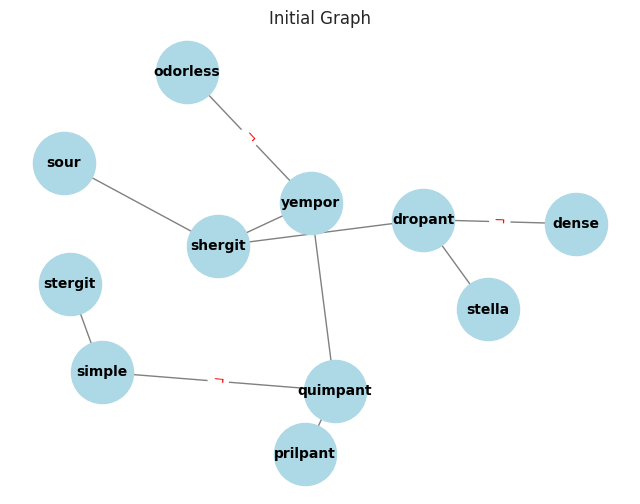

Removed edge: shergit -> yempor from path ['stella', 'dropant', 'shergit', 'yempor', 'quimpant', 'simple']


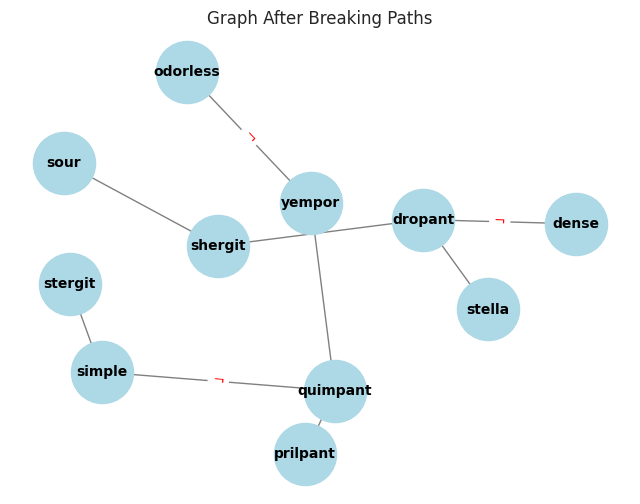

Added chain: stella -> wumpus -> yumpus -> zumpus -> dumpus -> simple with net negation False


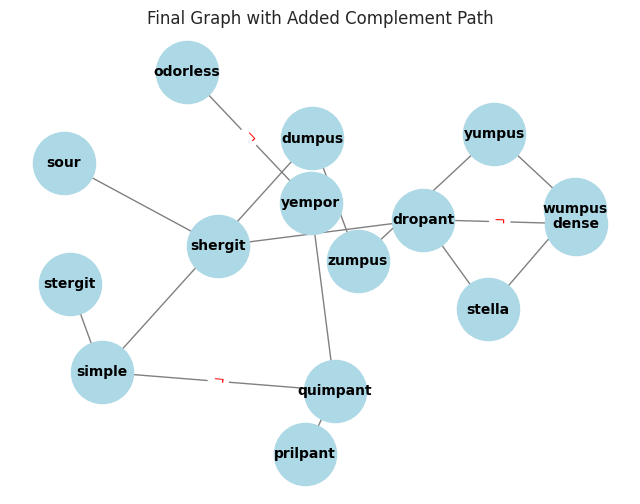


Modified Question:
Each Dropant is not dense. Each Dropant is shergit. Each Shergit is sour. Each Yempor is not odorless. Each Yempor is quimpant. Each Quimpant is not simple. Each Quimpant is prilpant. Each Stergit is simple. Each stella is dropant. Each stella is wumpus. Each Wumpus is yumpus. Each Yumpus is zumpus. Each Zumpus is dumpus. Each Dumpus is simple.

Query:
True or false: Stella is not simple.


In [35]:
original_question = (
    "Every dropant is not dense. Dropant are shergit. Each shergit is sour. "
    "Shergit are yempor. Yempor are not odorless. Each yempor is a quimpant. "
    "Each quimpant is not simple. Each stergit is simple. Quimpant are prilpant. "
    "Stella is a dropant."
)
query = "True or false: Stella is not simple."

new_question, new_query = modify_question(original_question, query)
print("\nModified Question:")
print(new_question)
print("\nQuery:")
print(new_query)
